# Imports & Settings

In [7]:
# Core tools
import numpy as np
import pandas as pd

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling tools
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
sns.set_theme()

# Baseline Model
I'll begin the modeling process by creating a baseline model using the preprocessed data for Microsoft (MSFT). Subsequent model iterations will also use MSFT as a test before creating a final pipeline to apply to each of the companies.
## Importing Data

In [3]:
df = pd.read_csv('../data/preprocessed_data/MSFT_preprocessed.csv')
df.head()

,Report Date,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adj.",...,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Price Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-30,1.309900e+10,-2.586000e+09,1.051300e+10,-6.816000e+09,-4.591000e+09,-2.225000e+09,3.697000e+09,155000000.0,3852000000,...,1.210000e+08,2.699000e+09,-1209000000,2009-06-30,23.969999,24.240000,23.629999,23.770000,18.209595,66452400.0
1,2009-09-30,1.292000e+10,-2.842000e+09,1.007800e+10,-5.596000e+09,-3.531000e+09,-2.065000e+09,4.482000e+09,283000000.0,4765000000,...,-1.292000e+09,-2.190000e+09,2747000000,2009-09-30,25.760000,25.990000,25.379999,25.719999,19.814228,63533400.0
2,2009-12-31,1.902200e+10,-3.628000e+09,1.539400e+10,-6.881000e+09,-4.802000e+09,-2.079000e+09,8.513000e+09,370000000.0,8883000000,...,-3.138000e+09,-4.277000e+09,599000000,2009-12-31,30.980000,30.990000,30.480000,30.480000,23.585039,31929700.0
3,2010-03-31,1.450300e+10,-2.755000e+09,1.174800e+10,-6.575000e+09,-4.355000e+09,-2.220000e+09,5.173000e+09,168000000.0,5341000000,...,-1.601000e+09,-2.726000e+09,-1267000000,2010-03-31,29.639999,29.719999,29.170000,29.290001,22.770212,63760000.0
4,2010-06-30,1.603900e+10,-3.170000e+09,1.286900e+10,-6.939000e+09,-4.589000e+09,-2.350000e+09,5.930000e+09,94000000.0,6024000000,...,-2.927000e+09,-4.098000e+09,-2650000000,2010-06-30,23.299999,23.680000,22.950001,23.010000,17.968822,81050500.0


## Fitting Model

In [4]:
def fit_model(df, target='Close'):
    '''
    Description:
    ------------
    Takes a dataframe and returns a fitted OLS model with price as the dependent variable.
    
    Parameters:
    ------------
    df : pandas.DataFrame
        This dataframe should include all of the predictors and the target column.
    
    target: str
        The name of the column being predicted (dependent variable).
    
    Example:
    ------------
    >>> fit_model(df)
    <statsmodels.regression.linear_model.RegressionResultsWrapper>
    '''
    # Removing object columns and non-fundamental columns
    df = df.select_dtypes(exclude=['object'])
    df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    
    # Setting predictor variables and fitting model
    predictors = df.drop(columns=[target])
    predictors = sm.add_constant(predictors)
    model = sm.OLS(df[target], predictors).fit()
    return model

baseline = fit_model(df)
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     66.11
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.76e-05
Time:                        23:41:24   Log-Likelihood:                -93.237
No. Observations:                  42   AIC:                             258.5
Df Residuals:                       6   BIC:                             321.0
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              66.8006    132.787      0.503      0.633    -258.118     391.720
Revenue                                             0.0053      0.011      0.503      0.633      -0.020       0.031
Cost of Revenue                                     0.0053      0.011      0.503      0.633      -0.020       0.031
Gross Profit                                       -0.0040      0.008     -0.503      0.633      -0.023       0.015
Operating Expenses                               2.976e-05   5.92e-05      0.503      0.633      -0.000       0.000
Selling, General & Administrative                   0.0013      0.003      0.503      0.633      -0.005       0.008
Research & Development                              0.0013      0.003      0.503      0.633      -0.005       0.008
Operating Income (Loss)                             0.0044      0.009      0.503      0.633      -0.017       0.026
Non-Operating Income (Loss)                         0.0057      0.011      0.503      0.633      -0.022       0.033
Pretax Income (Loss), Adj.                         -0.0057      0.011     -0.503      0.633      -0.033       0.022
Pretax Income (Loss)                               -0.0042      0.008     -0.503      0.633      -0.025       0.016
Income Tax (Expense) Benefit, Net                  -0.0042      0.008     -0.503      0.633      -0.025       0.016
Income (Loss) from Continuing Operations            0.0006      0.001      0.503      0.633      -0.002       0.004
Net Income                                          0.0035      0.007      0.503      0.633      -0.014       0.021
Net Income (Common)                                 0.0010      0.002      0.503      0.633      -0.004       0.006
Cash, Cash Equivalents & Short Term Investments -1.638e-09   3.19e-09     -0.514      0.626   -9.44e-09    6.16e-09
Accounts & Notes Receivable                      6.871e-10   4.07e-09      0.169      0.871   -9.27e-09    1.06e-08
Inventories                                     -1.615e-09   7.45e-09     -0.217      0.836   -1.98e-08    1.66e-08
Total Current Assets                                0.0030      0.006      0.503      0.633      -0.011       0.017
Property, Plant & Equipment, Net                    0.0001      0.000      0.503      0.633      -0.000       0.001
Long Term Investments & Receivables                 0.0001      0.000      0.503      0.633      -0.000       0.001
Other Long Term Assets                              0.0001      0.000      0.503      0.633      -0.000       0.001
Total Noncurrent Assets                             0.0029      0.006      0.503      0.633      -0.011       0.017
Total Assets                                        0.0054      0.0

## Evaluating Fitness

In [9]:
def print_rmse(df, target='Close', decimals=2):
    '''
    Description:
    ------------
    Takes a dataframe, splits it into train/test data, fits it to a linear regression model,
    then calculates and prints the RMSE for both the train and test portions rounded to two
    decimal places.
    
    Parameters:
    ------------
    df : pandas.DataFrame
        This dataframe should include all of the predictors and the target column.
    
    target: str
        The name of the column being predicted (dependent variable).
    
    decimals: int
        The number of decimals to round the output to.
    
    Example:
    ------------
    >>> print_rmse(df)
    Train RMSE: 100,000.00
    Test RMSE:  101,250.00
    '''
    # Removing object columns and non-fundamental columns
    df = df.select_dtypes(exclude=['object'])
    df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    
    X = df.drop(columns=[target])
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=85)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    print('Train RMSE:', round(rmse_train, decimals))
    print('Test  RMSE:', round(rmse_test, decimals))
    
print_rmse(df)

Train RMSE: 0.0
Test  RMSE: 29.61


## Plotting Residuals

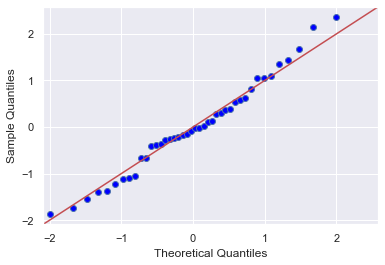

In [5]:
def qqplot(model):
    '''
    Description:
    ------------
    Takes an OLS model and returns a Q-Q plot of the model residuals.
    
    Parameters:
    ------------
    model : a fitted statsmodels.api.OLS() model
    
    Example:
    ------------
    >>> get_qqplot(model)
    <matplotlib.figure.Figure>
    '''
    return sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

qqplot(baseline);

## Observations
- The baseline model results are too good to be true (R^2 ~99.7%) as evidenced by the p-values of each of the independent variables
- The large condition number indicates that there's an issue with multicollinearity
- There are large scaling differences between the independent variables
- The model exhibits a large degree of overfitness based on the train and test RMSE values
- While the residuals are normally distributed, this model cannot be trusted